$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\ci}[0]{\text{i}}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$

In [35]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from ipywidgets import interact, FloatSlider, fixed
from matplotlib import rcParams
interactive(True)
rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings:*

* *Morin 4.4*
* *French Chapter 4*



# Expectations

## Remember:

* If an oscillator is driven at angular frequency $\omega$, then the oscillator also oscillates at angular frequency $\omega$, no matter what its value of $\omega_0$ and $\gamma$ are.
* If the oscillator is driven at $\omega \approx \omega_0$, then the oscillator resonates, i.e., it amplifies the oscillations of the driver.
* At resonance, the amplitude of the oscillations is approximately equal to half the amplitude of the forcing multiplied by $Q$: $A \approx QA_f/2$,
* When $\omega < \omega_0$, driving and oscillator oscillate in phase (think of the spring that is barely stretched or compressed); when $\omega > \omega_0$, driver and oscillator are in phase opposition, and when $\omega \approx \omega_0$, the oscillator lags the driver by a quarter cycle ($\pi/2$).
* The resonance frequency is exactly $\omega_0$ because it is where the peak in velocity response and power absorption are both located.

## Understand:

* Testing for $x = \text{Re}\left(A \eexp{\ci(\omega t-\delta)}\right)$ is validated by finding expressions for $A$ and $\delta$ that would satisfy the nonhomogeneous ODE.
* The connection between the transient and forced responses being superposed, and the mathematical result that the solution to a nonhomogeneous ODE is the sum of the complementary and particular solutions.
* The velocity is 1/4-cycle behind the oscillation; it means that at resonance, velocity and forcing are in phase, maximizing the work done with the force to the motion.

## Apply

* See worked examples, tutorials and problem sets.

# What we know so far about the damped-driven oscillator

Here is a demo (https://youtu.be/Is7shffFJFs), where I repeat these points.

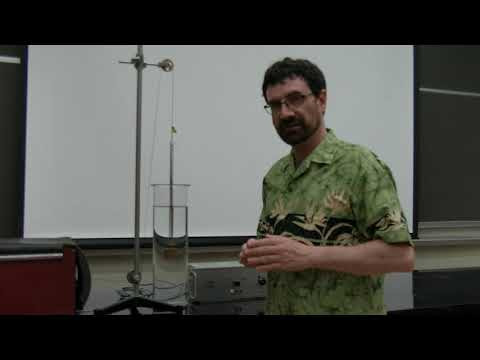

In [36]:
YouTubeVideo('Is7shffFJFs', width=800, height=300)

## Undamped case

Mathematically, we determined that we needed to solve an inhomogeneous ODE, with the LHS being the SHO equation, and the RHS being the forcing.
Switching to complex notations, this ODE was
$$ \boxed{\ddot z + \omega_0^2 z = \omega_0^2A_f\eexp{\ci\omega t}},$$
with $z \in \mathbb C$ and $\text{Re}(z) = x$.
We let out previous problem adopt an exponential, $z = Z\eexp{rt}$, and found that the frequency of oscillation was the same as the driving frequency $\omega$ and that
\begin{equation}
    Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2}.
    \label{eq:ZinCundamp}
\end{equation}

* For **low frequencies**, i.e., $\bs{\omega}$ < $\bs\omega_0$, the response was an oscillation of amplitude and phase lag with the driving
    $$A(\omega) = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2}\andeq \delta = 0.$$
* For **high frequencies**, $\bs{\omega}$ > $\bs\omega_0$, the response was characterized by
    $$A(\omega) = \frac{\omega_0^2 A_f}{\omega^2 - \omega_0^2} \andeq \delta = \pi.$$
* And at **resonance**, the response was
    \begin{equation}
        x(t) = \frac12 A_f\omega_0 t \cos\left(\omega_0 t - \frac\pi2\right).
        \label{eq:xResUndamped}
    \end{equation}

We didn't derive it so no worries if you don't know where it comes from. The most interesting piece of info was the $-\pi/2$ phase shift, namely, the position is a quarter-cycle behind the forcing, just like on the swing set.
And the second-most interesting piece of info was that the amplitude increased linearly with time, seemingly without end...

... Or not? Let's think about it: as the amplitude gets larger and larger, so does the velocity.
There will come a time when the friction will play a very important role.
So, let's reintroduce it.

## Damped oscillator

Adding damping added a now familiar term to the previous ODE, namely,
$$ \ddot z + 2\gamma \dot z +\omega_0^2 z = \omega_0^2 A_f\eexp{\ci \omega t},$$ 
and after offering an exponential for adoption, we obtain
$$r = \pm\ci \omega \andeq Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2 +2 \ci \gamma \omega}.$$
Technically, we solved the problem with this, a computer could just plot the magnitude and phase of this for us.
But let's try to understand this solution with pen-and-paper.

# General solution for a damped, driven oscillator

The algebra that follows can be intimidating because the terms are so big, so let me introduce a few intermediate quantities.
Let $p = \omega_0^2 - \omega^2$, $q = 2\gamma\omega$, after which $Z$ becomes
$$Z = \frac{\omega_0^2 A_f}{p + \ci q}.$$

The next step is to figure out the magnitude of $Z$, because it will tell us how far the mass goes given a certain forcing, and the phase, and we both know from before that they depend on the driving frequency $\omega$.
So, like before, let's use a polar representation $Z = A(\omega)\eexp{-\ci\delta(\omega)}$ and crank the algebra machine up.
The amplitude is the easiest, with
$$|Z| = \frac{\omega_0^2 A_f}{\sqrt{p^2 + q^2}} = \boxed{A(\omega) = \frac{\omega_0^2 A_f}{\sqrt{\left(\omega_0^2 - \omega^2\right)^2 + 4\gamma^2 \omega^2}}}.$$
Notice something on the denominator?
Inside the square root, you see the sum of two squared real expressions that are zero for different $\omega$'s, and whose sum is therefore never zero.
The denominator is therefore always positive now, the amplitude never diverges to infinity!

For the phase, I find it easier to decompose $Z/A(\omega)$ into real and imaginary parts to obtain the cos and sin.
This is like finding the real and imaginary parts of the division of two complex numbers, which we saw in the second lecture:
$$Z = \frac{\omega_0^2 A_f}{p + \ci q}\frac{p - \ci q}{p - \ci q} = \frac{\omega_0^2 A_f(p - \ci q)}{p^2 + q^2}.$$

To get the cos and sin of the phase, we divide this by $A(\omega)$ to obtain
$$\frac{Z}{A} = \eexp{-\ci \delta} = \cos\delta - \ci\sin\delta = \frac{p}{\sqrt{p^2 + q^2}} - \ci \frac{q}{\sqrt{p^2 + q^2}}.$$
Because $p$, $q$ and $D$ are all real, identifying the real and imaginary parts is easy, it's just
$$\cos\delta = \frac{p}{\sqrt{p^2 + q^2}} \andeq \sin\delta = \frac{q}{\sqrt{p^2 + q^2}}.$$

Before unpacking what will probably be a voluminous expression, let's see if the tangent of the phase would be enough.
I am educating this guess with two pieces of information:

* In the undamped case, the phase was 0 or $\pi$. We could hope that our phase would be in the same $[0, \pi)$ bracket, and therefore the knowledge of $\cos\delta$, $\sin\delta$ or $\tan\delta$ alone would be enough to know $\delta$.
* I already know the answer: it works.

Now that this tension has dissipated, let us reveal the phase shift with respect to the forcing, namely,
$$\tan \delta = \frac{\sin\delta}{\cos\delta} = \frac qp = \frac{2\gamma \omega}{\omega_0^2 - \omega^2} \thrfor \boxed{\delta(\omega) = \arctan\left(\frac{2\gamma\omega}{\omega_0^2 - \omega^2}\right)}.$$

Notice that the denominator isn't defined when $\omega_0 = \omega$.
That's OK, just recall that when $\omega = \omega_0$, $p = 0$, and therefore,
$\cos\delta(\omega=\omega_0) =0$, $\sin\delta(\omega = \omega_0) = q/\sqrt{0^2 +q^2} = +1$, and therefore, $\delta = \pi/2$... like in the undamped case!

In terms of units, the numerator of $A(\omega)$, $\omega_0^2 A_f$ is in units of $[L][T]^{-2}$. The denominator $\sqrt{(\omega^2 - \omega_0^2)^2 + \dots}$ is in units of $[T]^{-2}$, so $A$ is in units of length indeed. Similarly for $\tan \delta$, $2\gamma\omega$ is in units of $[T]^{-2}$, same as the denominator of the tangent, $\omega_0^2 - \omega^2$.

Let us study the behaviour of the solution $x = A(\omega)\cos\left[\omega - \delta(\omega)\right]$ for different frequencies.

# Varying the forcing frequency

## Plots

Let's plot first and further analyze our analytical formulas after.

In [61]:
A_f, omega_0 = 0.25, 2.  # to illustrate
T_0 = 2*np.pi/omega_0
t = np.linspace(0, 6*T_0, 1024)  # time array
omega_array = np.linspace(0.01*omega_0, 3*omega_0, 1024)  # array of angular frequencies
ftsz = 12

In [62]:
def plot_A_delta(Q):
    """ We normalize the amplitude by A_f """
    gamma = omega_0/Q
    A0 = 0.5*Q
    Amax = 0.5*Q * (1 - Q**-2)**-.5  # see calculation after the plot

    Z = omega_0**2 * A_f / ((omega_0**2-omega_array**2 + 2j*gamma*omega_array))
    A = abs(Z)
    delta = -np.angle(Z)

    plt.figure()

    # the sub-plot for the amplitude
    plt.subplot(211)  
    ax1 = plt.gca()
    # plotting the non-dimensional amplitude
    ax1.plot(omega_array/omega_0, A/A_f, 'b')
    ax1.axvline(1., color='k', linestyle='--')  # the omega = omega_0 mark
    ax1.plot([0.45, 0.95], [Amax, Amax], 'b--')
    ax1.text(0.43, Amax, '$A_{max}$', fontsize=ftsz, color='b', ha='right')
    ax1.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax1.set_xlim((0., 3))
    ax1.set_ylabel(r'$A(\omega)/A_{\!f}$', fontsize=ftsz)
    ax1.set_yticks([1., 5., 10.])
    ax1.grid()

    # the sub-plot for the phase
    plt.subplot(212)  
    ax2 = plt.gca()
    ax2.plot(omega_array/omega_0, delta, 'r')  # plotting the phase
    ax2.axvline(1., color='k', linestyle='--')  # the omega = omega_0 mark
    ax2.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax2.set_xlim((0., 3))
    ax2.set_ylabel(r'$\delta(\omega)$ [rad]', fontsize=ftsz)
    ax2.set_ylim([-0.1*np.pi, 1.1*np.pi])
    ax2.set_yticks([0., 0.5*np.pi, np.pi])
    ax2.set_yticklabels(['$0$', r'$\frac{\pi}{2}$', '$\pi$'], fontsize=ftsz)
    ax2.annotate(text='$\omega=\omega_0$', xy=(1., 0.5*np.pi), xytext=(1.15, 0.6*np.pi),
                 arrowprops=dict(arrowstyle='->'), fontsize=ftsz)
    ax2.text(0.01, np.pi/10., '$F$, $x$ in phase', fontsize=ftsz, color='r')
    ax2.text(2., np.pi*0.84, '$F$, $x$ out of phase', fontsize=ftsz, color='r')
    ax2.text(0.45, np.pi*0.55, '$x$ lags $F$', fontsize=ftsz, color='r')
    ax2.grid()
    
    return

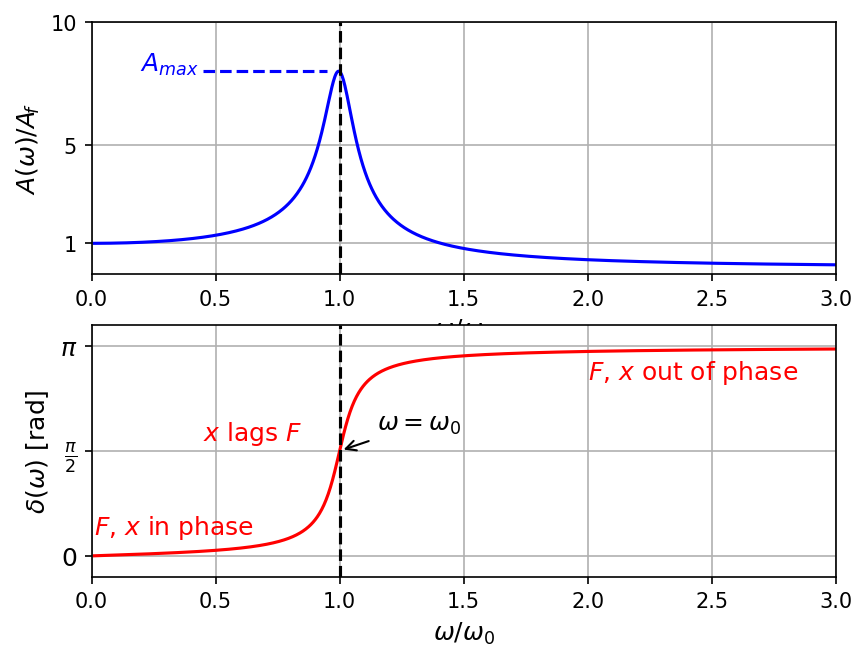

In [63]:
plot_A_delta(16.)  # Quality factor of 16, like in the previous lecture.

## Limit behaviours

* At **very low frequency**, 
    $$\lim_{\omega\to 0}A = \frac{\omega_0^2 A_f}{\sqrt{(\omega_0^2 - 0^2)^2 + 4\gamma^2 \times 0^2}} = A_f,$$
    the forcing amplitude.
    $$\lim_{\omega\to 0}\delta = \arctan(0) = 0.$$
    We find the same results as in the undamped case.

* At **very high frequency**, $\omega \gg \omega_0$
    $$A \approx \frac{\omega_0^2 A_f}{\sqrt{\omega^4 + 4\gamma^2 \omega^2}}\approx \frac{\omega_0^2 A_f}{\omega^2} \to 0,$$
    and
    $$\tan\delta \approx \frac{2\gamma}{-\omega} \to 0_- \thrfor \lim_{\omega\to\infty}\delta = \pi,$$
    the "-" subscript under $0_-$ meaning that $\tan\delta$ approaches zero from the negative side (better seen on a graph of $\tan(x)$), which means that $\delta \to \pi$.
    Again, we find the same results as in the undamped case.
    
    *Note: it could also have meant that* $\delta \to 0_-$*, but we also have* $\cos\delta<0$.
    
* At $\bs{\omega = \omega_0}$,
    $$A = \frac{\omega_0^2 A_f}{\sqrt{4\gamma^2 \omega_0^2}} = \frac{QA_f}{2} \andeq \delta = \frac\pi2.$$
    

## Maxima of the curves and resonance location

### Position $x$

From the figure above, it looks as if the maximum amplitude, i.e., resonance, happens for $\omega = \omega_0$.
A closer inspection of $A(\omega)$ reveals that it is not the case.
The numerator of $A(\omega)$ is a constant.
We can therefore find the maximum of $A(\omega)$ by finding the minimum of its denominator.
And because the denominator is a square root that is always positive, it is even more simple to find the minimum of the denominator squared:
$$\ode{\left[4\gamma^{2} \omega^{2} + \left(\omega_{0}^{2} - \omega^{2}\right)^2\right]}\omega = 4\omega\left[2\gamma^2 - \left( \omega_0^2 - \omega^2\right)\right].$$
The quantity above is zero if $\omega=0$ (uninteresting) or  if
$$\omega^2 =\omega_{\text{max}}^2 = \omega_0^2 - 2\gamma^2 = \omega^2_0\left(1-\frac2{Q^2}\right).$$

The maximum amplitude is found when $\omega = \omega_{max}$, 

$$ A(\omega_{\text{max}}) = A_{\text{max}} = \frac{Q}{2\sqrt{1 - 1/Q^2}}A_f. \qquad (3) $$
*(I will let you do the intermediate steps.)*

In the $Q\to\infty$ (damping $\to 0$) limit, $\omega_{max} = \omega_0$ and $A_{max} = QA_f/2$.
But in any case, $\omega_{max} < \omega_0$.

In the case of a lightly-damped oscillator, $\omega_d > \omega_{max}$.
You would be excused to have intuited that $\omega_{max} = \omega_d$, the pseudo-frequency of the oscillations.
After all, my qualitative explanation of resonance at the beginning of the chapter implied that resonance happens when the forcing "kicks" in sync with the free oscillations, which you would think happens every $T_d$.
As it turns out, it is not exactly the case.
Nonetheless, the plots above are for $Q=16$, which is not that big a quality factor, and yet, it is very hard to distinguish $\omega_0$ from $\omega_{max}$ and presumably from $\omega_d$.

Besides, when $Q$ is not big, damping is so strong that resonances are not very pronounced.
Therefore, **for all practical purposes,** $\boxed{\omega_{max} \approx \omega_0}$ **and** $\boxed{A_{max} \approx QA_f/2 = F_0 Q/(2k)}$.

### Velocity  $v$

For the velocity, things are actually a bit easier to remember.
If $x = A(\omega)\cos\left[\omega t - \delta(\omega)\right]$, then 
$$v = -\omega A(\omega) \sin\left[\omega_t - \delta(\omega)\right] = +V(\omega) \cos\left[\omega t - \delta(\omega) + \frac\pi2\right],$$
having used $\cos(\theta + \pi/2) = -\sin\theta$ and with 
\begin{equation}
    V(\omega) = \omega A(\omega) = \frac{\omega\omega_0^2 A_f}{\sqrt{\left(\omega_0^2 - \omega^2\right)^2 + 4\gamma^2 \omega^2}} = \frac{\omega_0 A_f}{\sqrt{\left(\frac{\omega_0}{\omega} - \frac{\omega}{\omega_0}\right)^2 + \frac{4\gamma^2}{\omega_0^2}}}
    \label{eq:V}
\end{equation}
the velocity amplitude.
For the last expression, I divided both the numerator and the denominator by $\omega\omega_0$.

This says a few things.

* At very low frequency, $V(\omega) \to 0$: you may be following the position of your legs on your swing, but your are not going very fast.
* **The maximum of $V(\omega)$ actually happens at $\bs{\omega = \omega_0}$**. No need to take any derivative, just stare the expression for $V(\omega)$ in the eyes, don't blink, and follow my reasoning.
    The numerator is constant so $V$ is maximum when the denominator is minimum.
    And because $4\gamma^2/\omega_0^2$ is constant, the denominator is minimum when $\left(\omega_0/\omega - \omega/\omega_0\right)^2$ is minimum.
    And because the latter is the square of something real, it is minimum when it is zero, i.e., when $\omega = \omega_0$.
    This is why, after all this fuss and calculating all of these $\omega_d$'s and other $\omega_{max}$'s, **we define the resonance frequency to be $\omega_0$.** Not by convenience actually. It will correspond to the frequency at which the most energy is absorbed by the oscillator, as we are about to see.
* The phase shift by $\pi/2$ means that the new phase lag between forcing and velocity response is $\delta - \pi/2$.
    This means that **at resonance, velocity and forcing are exactly in phase**. This also has energetic implications, as we are about to see.

## Varying the damping or $Q$

See below for plots of the amplitude and phase when $Q$ varies.

In [64]:
def plot_res_Q():
    """ We re-use all the quantities of the undamped case, but introduce damping
    we now vary the damping. """

    fa, ax1 = plt.subplots(1, 1, figsize=(6, 2))  # the figure for the amplitude

    fp, ax2 = plt.subplots(1, 1, figsize=(6, 2))  # the figure for the phase

    list_of_Qs = [.5, 1., 2., 4., 16.]

    # plot the undamped case first
    A_undamped = abs(A_f*omega_0**2/(omega_0**2 - omega_array**2))
    delta_undamped = 0*omega_array
    delta_undamped[omega_array > omega_0] = np.pi  # inside the brackets is a mask
    # it means that all values of delta corresponding to omega_array > omega_0 will
    # be changed to pi
    ax1.plot(omega_array/omega_0, A_undamped/A_f,
             'g-.', linewidth=3, label=r'$Q\ \to\ \infty$')
    ax2.plot(omega_array/omega_0, delta_undamped,
             'g-.', linewidth=3, label=r'$Q\ \to\ \infty$')

    # then plot the damped cases
    lnwt = 0.5
    for Q in list_of_Qs:
        gamma = omega_0/Q

        A = omega_0**2/((2*gamma*omega_array)**2
                        + (omega_0**2 - omega_array**2)**2)**.5
        delta = np.arctan(2*gamma*omega_array/(omega_0**2 - omega_array**2))
        delta[delta<0] += np.pi

        if Q == 0.5:
            lstl = '--'  # a dashed curve for the critical case
        else:
            lstl = '-'

        ax1.plot(omega_array/omega_0, A, 'b', linewidth=lnwt, linestyle=lstl,
                label='$Q = {0:.2f}$'.format(Q))  # non-dimensional amplitude
        ax2.plot(omega_array/omega_0, delta, 'r', linewidth=lnwt, linestyle=lstl,
                label='$Q = {0:.2f}$'.format(Q))  # phase
        lnwt += 0.5

    Q_array = np.linspace((0.5)**.5 + 0.001, 10., 512)  # an array of Q's to plot A_max = f(omega_res)
    omega_max = omega_0*(1 - 0.5/Q_array**2)**.5
    A_max = Q_array/(1 - 0.25/Q_array**2)**.5

    ax1.plot(omega_max/omega_0, A_max, 'k-.', linewidth=2.,
             label='$A_{max} = f(\omega_{max})$')

    ax1.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax1.set_xlim([0., 3.])
    ax1.set_ylabel(r'$A(\omega)/A_{\!f}$', fontsize=ftsz)
    ax1.set_ylim([0, 8.5])
    ax1.set_yticks([1., 4., 8.])
    ax1.legend()
    ax1.grid()

    ax2.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax2.set_ylabel(r'$\delta(\omega)$ [rad]', fontsize=ftsz)
    ax2.set_ylim([-0.1*np.pi, 1.1*np.pi])
    ax2.set_yticks([0., 0.5*np.pi, np.pi])
    ax2.set_yticklabels(['$0$', r'$\frac{\pi}{2}$', '$\pi$'], fontsize=ftsz)
    ax2.set_xlim([0., 3.])
    ax2.grid()
    ax2.legend(loc='lower right')
    
    return

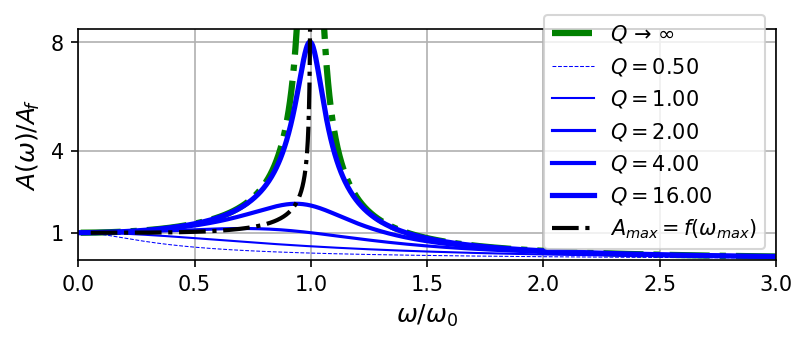

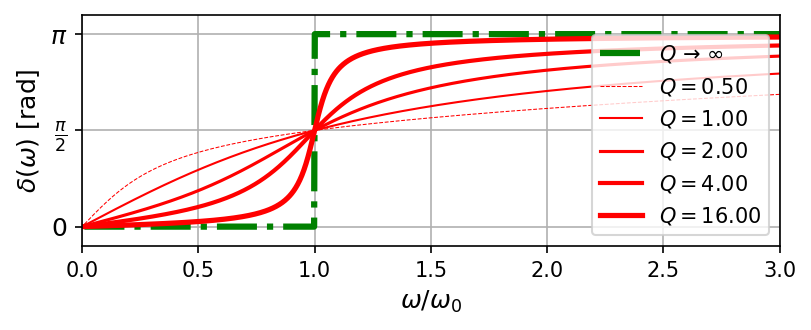

In [65]:
plot_res_Q()

# Transient Response

The solution we computed was valid after the oscillations had time to establish themselves.
Initially though, there is always a transient phase, during which multiple forms of motion coexist.
See for example the video below (Jupyter) or at https://youtu.be/IEve6in-eUg and https://play.library.utoronto.ca/ca2d0e98c625262852fedb6dbf68bbbf.

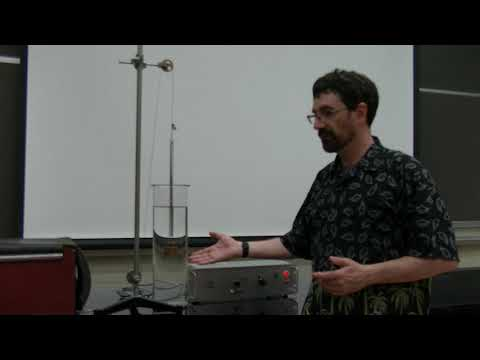

In [42]:
YouTubeVideo('IEve6in-eUg', width=800, height=300)

To clarify, recall that the forced ODE is an inhomogeneous ODE, meaning that the total solution is the sum of a particular solution $x_p$, and of the homogeneous solution $x_h$.
The general solution is then written
$$x = x_h + x_p.$$

* We computed $x_h$ during lecture 4, it is simply the free response, i.e., the one without forcing
    $$x_{h} = A_{h}\eexp{-\gamma t}\cos(\omega_d t + \phi),$$
    assuming we know the initial conditions.
* We computed $x_p$ in this lecture, 
    $$x_p = A(\omega) \cos(\omega t - \delta(\omega)).$$


Then, $\boldsymbol{x = x_{p} + x_{h}}$ **is indeed also a solution of** $\boldsymbol{\ddot x +\gamma \dot x + \omega_0^2 x = A_f\cos(\omega t)}$, as you can fairly easily check by just plugging in the above solution into the full equation of the forced problem.

What does it mean physically?
It means that, for example, if an engine is started from 0 to 100% instantly (*step response*), there will be an initial vibration corresponding to the engine natural frequencies, which will linger until dissipation removes it.

Also, because $\omega_d \neq \omega$ in general, the two oscillations might look in phase at some time, and out-of-phase at other times, creating a "beating" phenomenon, which we will talk more about when we talk about coupled oscillators. 
It was visible in both class demos I shared in this chapter (the second one being dedicated to it), in which I had to wait for a while every time I would change the frequency.
I also plot an example here (fig. 7).

In [66]:
def plot_transient():
    # Let's plot an example
    Q = 40.
    gamma = omega_0/Q
    omega_d = omega_0*np.sqrt(1. - 1/Q**2)
    omega = omega_0*1.2
    t = np.linspace(0, 150., 1024)

    Amp = omega_0**2/((gamma*omega)**2 + (omega_0**2 - omega**2)**2)**.5
    delta = np.arctan(gamma*omega/(omega_0**2 - omega**2))
    if delta<0:  # arctan only outputs results in [-pi/2, pi/2]; need to add some phase
        delta += np.pi
    x_forced = Amp*np.cos(omega*t - delta)

    x_free = Amp*np.exp(-0.5*gamma*t)*np.cos(omega_d*t)  # I set both amplitudes to the same

    x_tot = x_free + x_forced
    xmax = max(x_tot)

    x_tot /= xmax
    x_forced /= xmax
    x_free /= xmax

    plt.figure()

    plt.subplot(311)
    ax1 = plt.gca()
    ax1.plot(omega*t, x_free)
    ax1.set_title('All distances are divided by $\max(x)$')
    ax1.set_ylabel('free $x_h$', fontsize=ftsz)
    ax1.set_ylim([-1., 1.])
    ax1.grid()

    plt.subplot(312)
    ax1 = plt.gca()
    ax1.plot(omega*t, x_forced)
    ax1.set_ylabel('forced $x_p$', fontsize=ftsz)
    ax1.set_ylim([-1., 1.])
    ax1.grid()

    plt.subplot(313)
    ax1 = plt.gca()
    ax1.plot(omega*t, x_tot)
    ax1.set_ylabel('total $x$', fontsize=ftsz)
    ax1.set_xlabel('$\omega t$', fontsize=ftsz)
    ax1.grid()

    plt.tight_layout()
    return

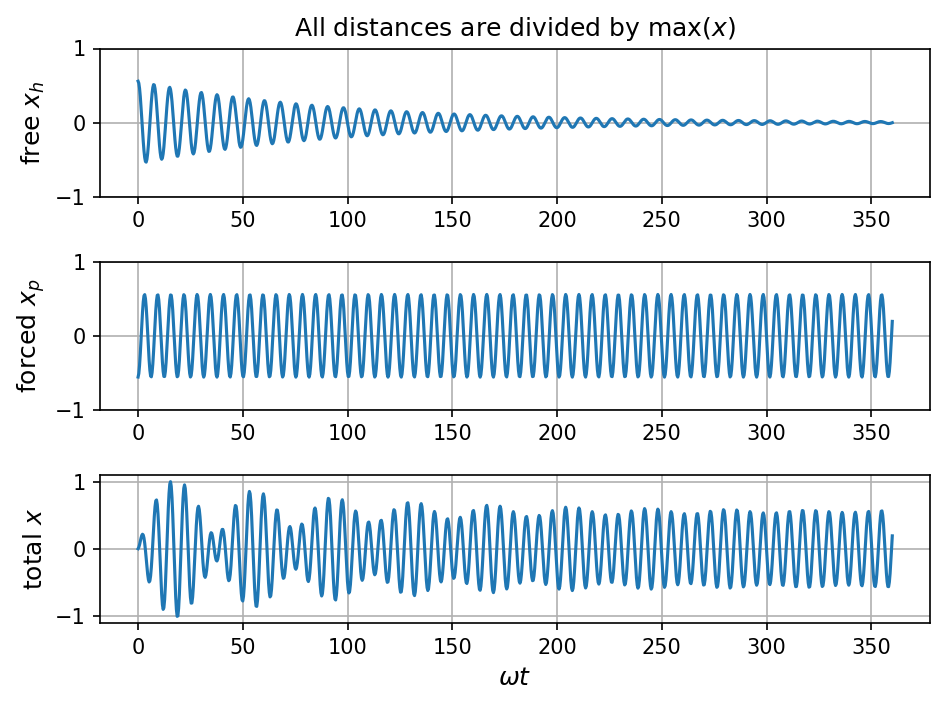

In [53]:
plot_transient()


# Power absorbed by damping during forced oscillations

When the regime is stationary, i.e., when the transient has subsided and the oscillations have a steady amplitude, then you are supplying as much power to the system as the system dissipates power.
Therefore, as paradoxical as it may sound, knowing how much the system dissipates under a given oscillatory regime tell us directly how much power we need to supply to that oscillation.

## Derivation

Off-resonance, dissipation is not the reason why stationary oscillating forcing don't diverge.
It is just the consequence of the forcing, working *with* the motion during parts of the cycle (it provides the oscillator with energy), and *against* it during some other parts (it takes energy back).

The power provided by a force $\vec F$ on a particle travelling with velocity $\vec v$ is $\vec F \cdot \vec v$, and the same applies for the friction force.
Now, friction really *removes* energy from the motion of the mass.
To keep things positive, I will compute *minus* the power supplied by the friction, or, *plus* the power *lost* by the mass:
$$P = -F_{\text{friction}}v = b v^2 = b V^2(\omega)\sin^2(\omega t -\delta).$$

This quantity varies over time, which makes sense: friction doesn't act when the mass is at rest.
However, it is not very useful to have this much information about the time evolution, and very often, we just want to know the *average* power drain (the one billed by your energy company), which can be defined as the average over one cycle.
I will denote such an average quantity with a bar, and define it mathematically as
$$ \overline P(\omega) = \frac1T\int_{t_0}^{t_0+T}P(\omega, t)\di t, \quad \textrm{with} \quad T = \frac{2\pi}{\omega}.$$

In our case, the only time-dependent piece of $P(t)$ is $\sin(\omega t - \delta)$. 
With the change of variable $\omega t \to y$, $\di t \to \di y/\omega$, we have
$$ \int_{t_0}^{t_0+T} \sin^2(\omega t - \delta)\di t = \frac1\omega \int_{\omega t_0}^{\omega t_0 + 2\pi} \sin^2(y -\delta)\di y = \frac\pi\omega = \frac T2.$$
In the calculation above, I used  the fact that for $\sin$, shifting either the lower integration bound ($\omega t_0$) or the phase ($\delta$) does not change the integral over a full period.

For the expression of $V(\omega)$, recall eqn. \eqref{eq:V} and you get
\begin{equation}
    \overline P(\omega) = \frac{b\omega_0^2 A_f^2}2 \frac{1}{\left(\frac{\omega_0}{\omega} - \frac{\omega}{\omega_0}\right)^2 + \frac{4\gamma^2}{\omega_0^2}}
    \label{eq:Pbar}
\end{equation}

Like the velocity, the absorbed power is maximum for $\omega = \omega_0$. It is arguably for this reason, rather than $\omega_0$ being the frequency that maximizes $V$, that $\bs{\omega_0}$ **is the frequency that is called the resonance frequency.**
At resonance,
$$\overline P(\omega_0) = \overline P_{\max{}} = \frac{b\omega_0^4 A_f^2}{8\gamma^2}.$$

Below I plot $\overline P(\omega)$, although I zoom in around $\omega = \omega_0$ to highlight the features of the peak.

In [67]:
# Let's plot!
Q = 16  # quality factor (lightly damped oscillator)
gamma = omega_0/Q
b = 1.*gamma  # using mass=1
Pmax = b*omega_0**4*A_f**2/8/gamma**2

def plot_Pbar():
    # Note: I divide P by A_f**2 directly
    P = 0.5*b*omega_0**2*A_f**2 / (
        (omega_0/omega_array - omega_array/omega_0)**2 + (2*gamma/omega_0)**2)

    plt.figure()
    ax1 = plt.gca()

    # plotting the power curve
    ax1.plot(omega_array, P, 'b')  # plotting the non-dimensional power
    ax1.axvline(1.*omega_0, color='k', linestyle='--')  # the omega = omega_0 mark
    ax1.text(0.98*omega_0, 1.02*Pmax, '$\overline{P} = \overline{P}_{\max}$',
             fontsize=ftsz, color='b', ha='right')
    ax1.axhline(0.5*Pmax, color='k', linestyle='--')  # the P = Pmax/2 mark
    ax1.text(0.8*omega_0, 0.52*Pmax, '$\overline{P} = \overline{P}_{\max}/2$',
             fontsize=ftsz, color='b', ha='right')
    ax1.set_xlabel('$\omega$', fontsize=ftsz) 
    ax1.set_ylabel(r'$\overline{P}\,(\omega)/\overline{P}_{\max}$ [W]', fontsize=ftsz)
    ax1.set_yticks([0., .5*Pmax, Pmax])
    ax1.set_xticks([om*omega_0 for om in np.arange(0.2, 3., 0.2)])  # Google: "list comprehension Python"
    ax1.set_xticklabels(["${0:.1f}\omega_0$".format(om) for om in np.arange(0.2, 3., 0.2)])
    ax1.set_ylim([0., 1.1*Pmax])
    ax1.set_xlim([0.6*omega_0, 1.6*omega_0])  # we are zooming around the peak
    ax1.grid()

    # plotting the full width at half height
    ax1.annotate(text='$\omega_{fwhh} = 2\gamma$',
                 xy=((1-1./Q)*omega_0, 0.5*Pmax), xytext=((1+1.3/Q)*omega_0, 0.5*Pmax),
                 arrowprops=dict(arrowstyle='<|-|>', color='r'),
                 backgroundcolor='w', ha='left', va='center', 
                 fontsize=ftsz, color='r')

    plt.tight_layout()
    return

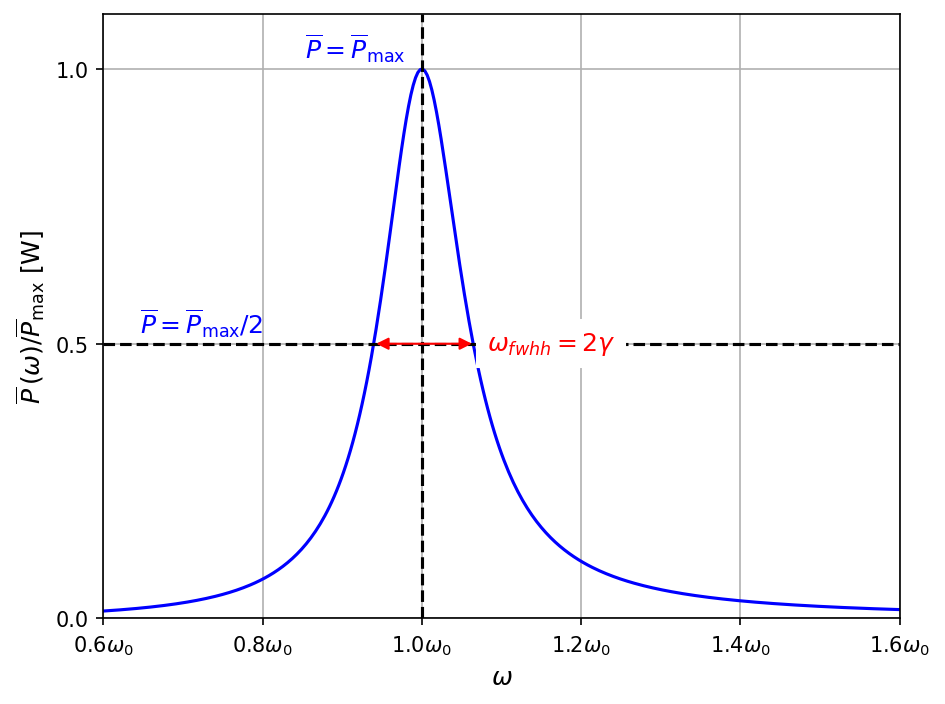

In [68]:
plot_Pbar()

**Recall that a power has the units of W (Watts), J$\,$s**$^{\bs{-1}}$ **(Joules per second) or kg$\,$m**$^{\bs{2}}$**$\,$s**$^{\bs{-1}}$ **(SI base units), which are all the same.**

Another important parameter to characterize the resonance is the full width at half height of the curve, $\omega_{\text{fwhh}}$, which is best described graphically, as shown above.

There is no easy analytical expression for $\omega_{\text{fwhh}}$ if the full expression of $\overline P(\omega)$ is retained.
Instead, we can find an approximate form if $\omega \approx \omega_0$.
Around this frequency, most of the variations of $\overline P(\omega)$ are due to the $(\omega_0/\omega - \omega/\omega_0)^2$ term in eqn. \eqref{eq:Pbar}.
It means that we can approximate the expression of $\overline P$ by doing the following three things to eqn. \eqref{eq:Pbar}:

* Write $(\omega_0/\omega - \omega/\omega_0)^2 = (\omega_0^2 - \omega^2)^2/(\omega\omega_0)^2$
* replace $\omega$ by $\omega_0$ almost everywhere,
* except in the $(\omega_0^2 - \omega^2)^2$ term. In this term, we approximate $\omega^2 - \omega_0^2 = (\omega - \omega_0)(\omega + \omega_0) \approx 2\omega_0\Delta\omega,$ with $\Delta\omega = \omega - \omega_0 \ll 2\omega_0$.

We then have
$$\overline P(\omega) = \frac{b\omega_0^4 A_f^2}8 \frac{1}{(\Delta\omega)^2 + \gamma^2} = \frac{\overline P_{\max{}}}{1 + (\Delta \omega/\gamma)^2}.$$

It is now much easier to find an approximate expression for $\omega_{\text{fwhh}}$.
When $\overline P/\overline P_{\max{}} = 1/2$, then $1 + (\Delta \omega/\gamma)^2 = 2$ and  $(\Delta\omega)^2 \approx \gamma^2$.
Square-root that and you get
$$ \boxed{\underbrace{\omega_{\text{fwhh}} = 2\Delta\omega}_{\text{by definition}} \approx 2\gamma = \frac{2\omega_0}Q.} $$

Consequently, if friction ($\gamma$) decreases, the power resonance curve becomes narrower (see figure below).
That is, with a high-$Q$ oscillator, it is much easier to "miss" resonance when adjusting the frequency. But when resonance is attained, the system dissipates a lot more power than in a high-damping case.
In this case, less damping means more energy dissipation (but only for $\omega \approx \omega_0$).

In [47]:
# we re-use everything
def plot_Pbar_Q():
    plt.figure()  # the figure for the amplitude
    ax1 = plt.gca()

    list_of_Qs = [.5, 1., 2., 4., 8.]

    lnwt = 0.5
    for Q in list_of_Qs:
        gamma = omega_0/Q
        P = 0.5*b*omega_0**2*A_f**2 / (
            (omega_0/omega_array - omega_array/omega_0)**2 + (2*gamma/omega_0)**2)
        ax1.plot(omega_array/omega_0, P, 'b', linewidth=lnwt,
                label='$Q = {0:.2f}$'.format(Q))  # non-dimensional amplitude
        lnwt += 0.5

    ax1.set_title('$\omega_0$ kept constant, $\gamma$ varied.')
    ax1.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax1.set_ylabel(r'$\overline{P}\,(\omega)$ [W]', fontsize=ftsz)
    ax1.set_xlim([0., 3.])
    ax1.legend()
    ax1.grid()


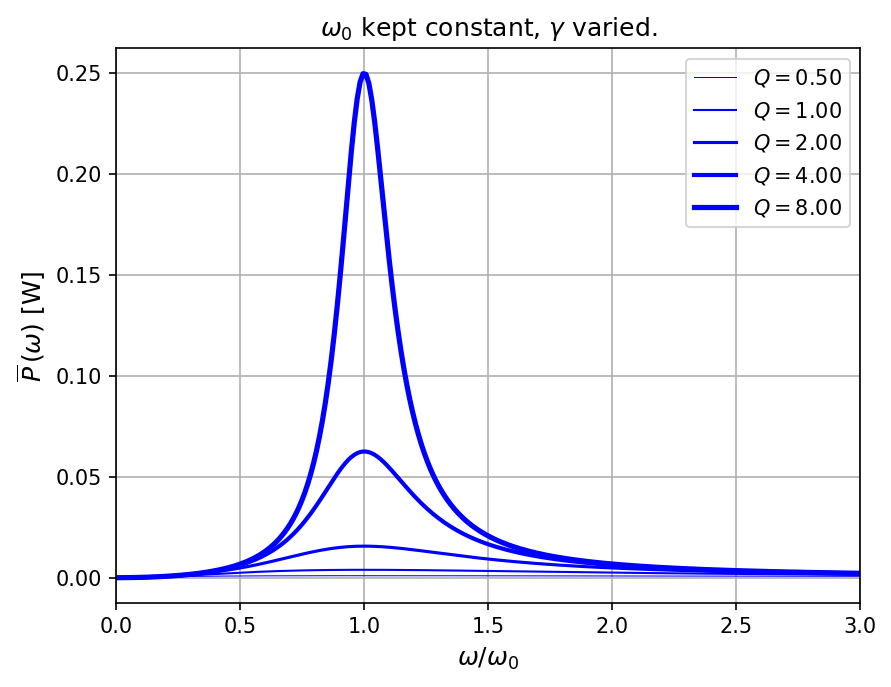

In [48]:
plot_Pbar_Q()

Which brings us to a third interpretation of the quality factor $Q$, which is
$$ \boxed{Q = \frac{\omega_0}{\gamma} \approx \frac{2\omega_0}{\omega_{\text{fwhh}}} = \frac{2\times\text{resonance frequency}}{\text{full width at half-height of power curve}}}. $$

# Applications

## Spectra of astrophysical bodies

Atoms and molecules resonate at certain frequencies, i.e., those that make their electrons jump levels. Atoms gorge themselves of the EM waves with which they resonate, and absorb so much power that the light of astrophysical bodies carries the signature of these resonances. This is how the chemical composition of the atmosphere of astrophysical bodies gets determined (see two figures below).

![The visible color spectrum, from 380 nm to 710 nm. The black lines are Fraunhofer lines, and correspond to frequencies that resonate with the molecules, present in the Sun's atmosphere. By Fraunhofer_lines.jpg: nl:Gebruiker:MaureenV Spectrum-sRGB.svg: Phrood Fraunhofer_lines_DE.svg: *Fraunhofer_lines.jpg: Saperaud 19:26, 5. Jul. 2005 derivative work: Cepheiden (talk) derivative work: Cepheiden [Public domain], via Wikimedia Commons](768px-Fraunhofer_lines.png)

![Same as Fig. 1, coded in light intensity. Each dip is like an inverted power resonance curve. By Spectrum of blue sky.png : Remember the dot Derivative work : Eric Bajart (Spectrum of blue sky.png) [CC BY-SA 4.0-3.0-2.5-2.0-1.0 (http://creativecommons.org/licenses/by-sa/4.0-3.0-2.5-2.0-1.0)], via Wikimedia Commons](800px-Spectrum_of_blue_sky.png)

Each "dip" in the curve above corresponds to a dark line in the spectrum above, an "absoprtion line. And each "dip" could be modelled as an upside-down power curve, their width being a measure of the damping coefficient in each molecule, etc, since light intensity is really a measure of incident power.

## A bridge that's not the Tacoma Narrows Bridge

An example where they could not change the frequency of resonance outside of the typical human step, so they dampened the hell out of the motion to make the resonance curve shorter and wider (https://en.wikipedia.org/wiki/Millennium_Bridge,_London#Resonance, video below at https://youtu.be/t6O43mrc1kA).

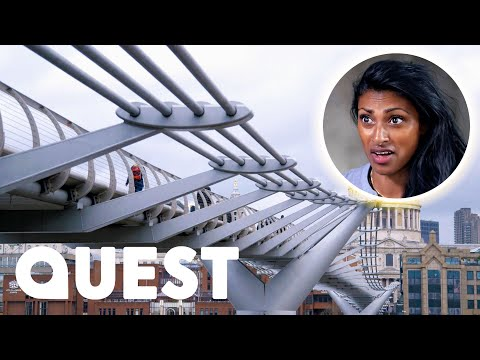

In [49]:
YouTubeVideo('t6O43mrc1kA')

## Tuned mass damper

He sometimes uses different Greek letters and names than me, but I'm sure you will be able to translate.

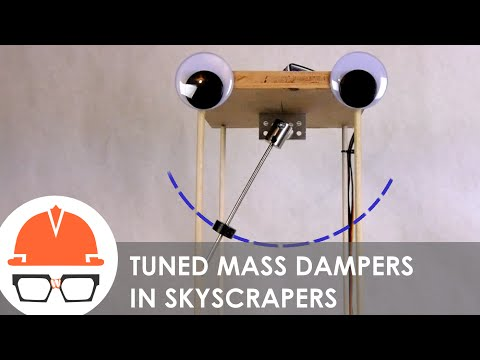

In [50]:
YouTubeVideo('f1U4SAgy60c')

# Summary

In this lecture, we saw the following.

* The amplitude of the position and phase lag between position response when forced at a certain frequency. Yes, we made it happen thanks to an exponential adoption.
* The mathematical concept of adding the general solution to the homogeneous ODE and a particular solution to the inhomogeneous ODE as the total solution to the inhomogeneous solution translates here physically into the superposition of a free, decaying solution and the stationary response to the forcing.
* The velocity is in phase with the forcing at resonance, which maximizes the forcing.

And maybe we had time to see that...
* the power curve's width, and how it is proportional to $\gamma$.